## Download dataset from Kaggle

In [1]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [01:42<00:00, 23.3MB/s]
100% 1.98G/1.98G [01:42<00:00, 20.8MB/s]


In [2]:
# unzip the dataset folder
import zipfile

zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

## Prepare train & test set

In [3]:
#import necessary libraries
import tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout,MaxPooling2D

In [16]:
# train & test contains different folder for diffrent classes, we can set labels as inferred. so it will take folder name as classes name.
# we need to read & combine the values in train & test set
# we are using keras image_dataset_from_directory function to read allthe files in the directory
# label mode is categorical. so classes are represented one hot encoded
# its a multiclass classification problem
# in CNN, we assume that all images that we are passing have same size. so we are setting image_size parameter
# setting the batch size, will help to run the code without crashing
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size= 32,
    image_size=(256,256)
    )


Found 3115 files belonging to 36 classes.


Note:
The train dtaset contains a total of 3115 image files belongs to 36 classes

In [17]:
# display the first five rows of the dataset
# dataset contains the colred images
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 36), dtype=tf.float32, name=None))>

In [18]:
# same steps for test dataset as well
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size= 32,
    image_size=(256,256)
    )

Found 359 files belonging to 36 classes.


Note: Test dataset contains 359 image files belongs to 36 classes

In [19]:
# print the shpae of image & labels for train & test
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels.shape)

for images, labels in validation_ds.take(1):
    print(images.shape)
    print(labels.shape)


(32, 256, 256, 3)
(32, 36)
(32, 256, 256, 3)
(32, 36)


## Image classifier using CNN

In [24]:
# convoltion BAse
# we are uisng keras sequential model
# in CNN, we will have Convolution layers- where we are applying filters to extract the primitive features(like edges)
from tensorflow.keras.regularizers import l2

model=Sequential()
# we are applying 32 filters of shape 3x3, No padding and activation function is ReLU
# our input is RGB image that why input shape set to 256,256,3
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
#Batch normalization helps prevent overfitting and speeds up training of deep neural networks
# its a kind of regularisation
# it add a new layer that performs standardizing and normalizing operations on the input of the layer
model.add(BatchNormalization())
# we are adding pooling layer to reduce the spatial dimension
# stride is the step of the convolution along x & y axis of the volume
# when we increase stride value to 2,2 .it will reduce the size of the output volume
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#add one more convolution layer with 64 filter
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#add one more convolution layer with 128 filter
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


# convert 2D into ID using Flatten method
model.add(Flatten())

# Fully Flattened layer-ANN
# added dropouts to fasten the training
# add a Dense layer with 128 neurons
# add l2 regularization
model.add(Dense(128,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
# add another Dense layer with 128 neurons
model.add(Dense(64,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
# since its a multi class classification problem, we need to use softmax activation function
# we have 36 classes, so we need 36 neurons at output layer
model.add(Dense(36,activation='softmax'))


In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_10 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

Note: Total number of trainable paramaters are 14850020.

In [26]:
# compile the model
# loss function is categorical_crossentropy, since its a multi class classification problem
# learning rate is reduced, because of low training & test accuracy

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

## Train the model

In [28]:
# one epoch is a pair of a f/w & b/w propogation
# training accuracy
# val accuracy from test accuracy
history=model.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
98/98 [==============================] - 68s 650ms/step - loss: 3.9552 - accuracy: 0.0957 - val_loss: 3.4199 - val_accuracy: 0.1838
Epoch 2/15
98/98 [==============================] - 69s 644ms/step - loss: 3.1593 - accuracy: 0.2456 - val_loss: 2.2524 - val_accuracy: 0.5320
Epoch 3/15
98/98 [==============================] - 67s 642ms/step - loss: 2.6341 - accuracy: 0.3897 - val_loss: 1.5841 - val_accuracy: 0.7382
Epoch 4/15
98/98 [==============================] - 67s 644ms/step - loss: 2.1143 - accuracy: 0.5047 - val_loss: 1.2316 - val_accuracy: 0.7994
Epoch 5/15
98/98 [==============================] - 67s 645ms/step - loss: 1.7285 - accuracy: 0.6331 - val_loss: 0.9336 - val_accuracy: 0.8774
Epoch 6/15
98/98 [==============================] - 69s 659ms/step - loss: 1.4537 - accuracy: 0.6915 - val_loss: 0.7973 - val_accuracy: 0.9081
Epoch 7/15
98/98 [==============================] - 72s 695ms/step - loss: 1.2339 - accuracy: 0.7528 - val_loss: 0.7593 - val_accuracy: 0.9248

Note: Validation accuracy is more than training accuracy, so its underfitting.

## Testing

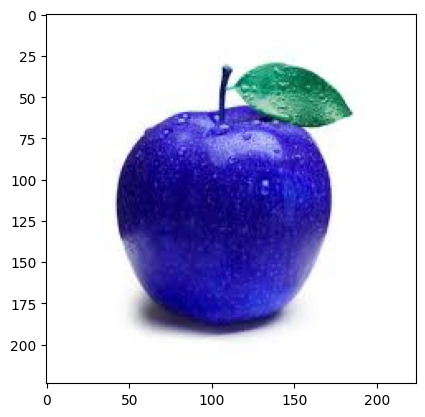

In [36]:
import cv2
import matplotlib.pyplot as plt

test_image=cv2.imread('/content/apple.jpeg')
plt.imshow(test_image)

In [37]:
# shape of the image
test_image.shape

(224, 224, 3)

In [42]:
# Convert the image from BGR (OpenCV default) to RGB
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Resize the image to the required input size of the model
test_image_resized = cv2.resize(test_image_rgb, (256, 256))

# Normalize the pixel values to the range [0, 1] since we are done batch normalisation
test_image_normalized = test_image_resized / 255.0

# Add a batch dimension
test_input = np.expand_dims(test_image_normalized, axis=0)


In [43]:
import numpy as np

predictions=model.predict(test_input)
# filter index for the max value of prediction
predicted_class_index = np.argmax(predictions, axis=1)[0]
# extract class labels from train_ds
class_labels = train_ds.class_names

# Get the class label correspond to the indes we extracted
predicted_class_label = class_labels[predicted_class_index]
print(predicted_class_label)

1/1 [==============================] - 0s 104ms/step
apple


Note: Correclty predicted the class of the image.

## Transfer Learning

In [59]:
import tensorflow as tf

In [60]:
# download weights of pretrained model, MobileNetV2
conv_base=tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(256,256,3)
    )

9406464/9406464 [==============================] - 2s 0us/step


In [61]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 128, 128, 32)         0         ['bn_Conv1[

In [62]:
# create CNN architecture
model=Sequential()
# add conv_base
model.add(conv_base)
# convert 2D into 1D
model.add(Flatten())
# Add DEnse layers
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
# define output layer
model.add(Dense(36,activation='softmax'))

In [64]:
# set conv_base trainable to false, to avoid the training of conv_base paramters
conv_base.trainable=False

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_4 (Flatten)         (None, 81920)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               10485888  
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 36)                4644      
                                                                 
Total params: 12765028 (48.69 MB)
Trainable params: 10507044 (40.08 MB)
Non-trainable params: 2257984 (8.61 MB)
________

Note: There are 10507044 trainable parameters.

In [66]:
# function to normalise the pixel values of the image
def normalize(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

In [67]:
# normalise the train &test dataset
train_ds=train_ds.map(normalize)
validation_ds=validation_ds.map(normalize)

In [68]:
# compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [69]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds) # train the model

Epoch 1/10
98/98 [==============================] - 77s 692ms/step - loss: 2.3688 - accuracy: 0.4873 - val_loss: 0.5748 - val_accuracy: 0.8357
Epoch 2/10
98/98 [==============================] - 83s 794ms/step - loss: 0.5428 - accuracy: 0.8437 - val_loss: 0.2178 - val_accuracy: 0.9443
Epoch 3/10
98/98 [==============================] - 77s 713ms/step - loss: 0.2344 - accuracy: 0.9307 - val_loss: 0.2854 - val_accuracy: 0.9443
Epoch 4/10
98/98 [==============================] - 90s 872ms/step - loss: 0.1448 - accuracy: 0.9586 - val_loss: 0.2352 - val_accuracy: 0.9638
Epoch 5/10
98/98 [==============================] - 69s 663ms/step - loss: 0.1177 - accuracy: 0.9657 - val_loss: 0.2367 - val_accuracy: 0.9582
Epoch 6/10
98/98 [==============================] - 74s 704ms/step - loss: 0.0974 - accuracy: 0.9737 - val_loss: 0.2751 - val_accuracy: 0.9582
Epoch 7/10
98/98 [==============================] - 77s 746ms/step - loss: 0.0891 - accuracy: 0.9750 - val_loss: 0.2835 - val_accuracy: 0.9471

Note: Training & validation accuracy are almost same.

In [70]:
test_image=cv2.imread('/content/potato.jpeg')

# Convert the image from BGR (OpenCV default) to RGB
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Resize the image to the required input size of the model
test_image_resized = cv2.resize(test_image_rgb, (256, 256))

# Normalize the pixel values to the range [0, 1] since we are done batch normalisation
test_image_normalized = test_image_resized / 255.0

# Add a batch dimension
test_input = np.expand_dims(test_image_normalized, axis=0)

predictions=model.predict(test_input)
# filter index for the max value of prediction
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the class label correspond to the indes we extracted
predicted_class_label = class_labels[predicted_class_index]
print(predicted_class_label)

1/1 [==============================] - 1s 1s/step
potato


Note: Correctly predicted the class of item.